In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

# load and visualise the tooth edge annotations
# Setup environments
import json

In [2]:

dataDir = os.path.join("C:\MIL_Src\data\points\consolidated\Caries Markup","C-MIL_Src-data-images-setB")
print(dataDir)
annotation_json = os.path.join(dataDir,"image8.tif.edges.json")
json_file = open(annotation_json)
mil_json = json.load(json_file)
json_file.close()
#print(mil_json)


C:\MIL_Src\data\points\consolidated\Caries Markup\C-MIL_Src-data-images-setB


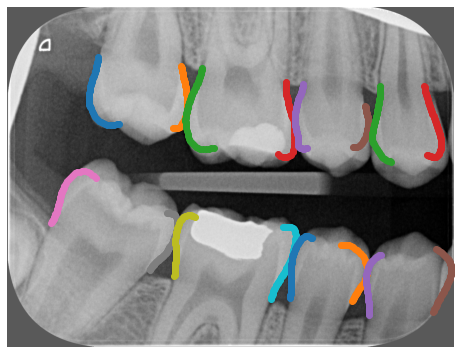

In [3]:
# Take a close look at the data - try to display it!
# mil_json['Teeth'][0]
# filename = mil_json['Filename']
# tooth = mil_json['Teeth'][0]
# leftEdgePointX = tooth['LeftEdge']['EdgePoints'][0]['X']
# leftEdgePointY = tooth['LeftEdge']['EdgePoints'][0]['Y']

# Show the image
I = io.imread(mil_json['Filename'])
plt.axis('off')
plt.imshow(I)

# Extract the edge points
for tooth in mil_json['Teeth']:
    LeftX = []
    LeftY = []
    for point in tooth['LeftEdge']['EdgePoints']:
        LeftX.append(point['X'])
        LeftY.append(point['Y'])

    plt.plot(LeftX,LeftY,'o')
    
    RightX = []
    RightY = []
    for point in tooth['RightEdge']['EdgePoints']:
        RightX.append(point['X'])
        RightY.append(point['Y'])

    plt.plot(RightX,RightY,'o')

plt.show()




In [22]:
# Preamble of the file
#
# https://cocodataset.org/#format-data

annotation_json = os.path.join(dataDir,"image8.tif.edges.json")
coco_json = 'annotations_coco.json'
image_id = 1

json_file = open(annotation_json)
mil_json = json.load(json_file)
json_file.close()

image_filename = mil_json['Filename']
I = io.imread(mil_json['Filename'])
width = I.shape[1]
height = I.shape[0]
category_id = 1

INFO = {
    "description": "MIL Tooth Dataset",
    "date_created": "2020-10-26"
}

LICENSES = [
    {
        "id": 1,
        "name": "Confidential",
    }
]

IMAGES = [
    {
        "id": 1, 
        "width": width, 
        "height": height, 
        "file_name": image_filename, 
        "license": 1, 
        "flickr_url": "", 
        "coco_url": "", 
        "date_captured": "2020-01-01",
    }
]

CATEGORIES = [
    {
        'id': category_id,
        'name': 'Quadrant1Premolar3',
        'supercategory': 'tooth',
    },
]


In [38]:
# Annotatons/Segmentations
# https://www.immersivelimit.com/tutorials/create-coco-annotations-from-scratch
# Now I need to convert these into COCO format

is_crowd = 0
annotation_id = 1
ANNOTATIONS = []
# convert to segmentation
for tooth in mil_json['Teeth']:
    ToothXY = []
    for point in tooth['LeftEdge']['EdgePoints']:
        ToothXY.append(point['X'])
        ToothXY.append(point['Y'])
    
    for point in reversed(tooth['RightEdge']['EdgePoints']):
        ToothXY.append(point['X'])
        ToothXY.append(point['Y'])

    # create the annotation from the tooth edge contours
    annotation = {
        'id': annotation_id,
        'image_id': image_id,
        'category_id': category_id,
        'segmentation': [ToothXY],
        'iscrowd': is_crowd,
    }
    ANNOTATIONS.append(annotation)

    annotation_id += 1



In [39]:
# Export to file
COCO_ANNOTAION = {
    "info": INFO, 
    "licenses": LICENSES,
    "images": IMAGES, 
    "annotations": ANNOTATIONS,
    "categories" : CATEGORIES
}


with open(coco_json, 'w', encoding='utf-8') as f:
    json.dump(COCO_ANNOTAION, f, ensure_ascii=False, indent=4)


In [40]:
# Load from JSON to COCO

coco=COCO(coco_json)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [41]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
Quadrant1Premolar3

COCO supercategories: 
tooth


In [42]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['Quadrant1Premolar3']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [1])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

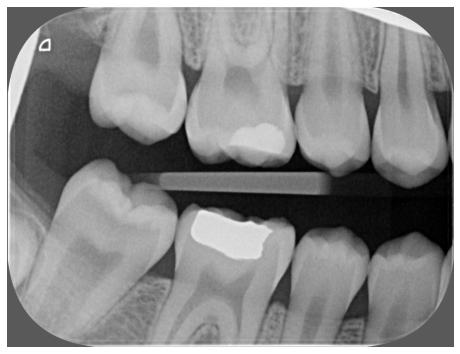

In [43]:
# load and display image
I = io.imread(img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

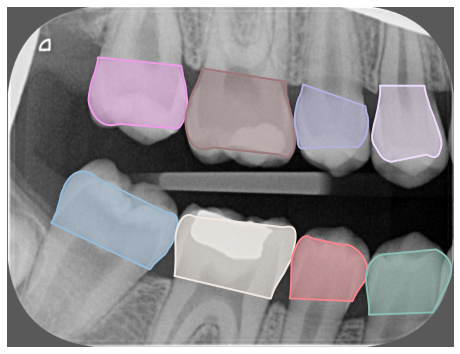

In [44]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [ ]:
# OTHER CODE

In [ ]:

dataDir='..'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [ ]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

In [ ]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

In [ ]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [ ]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [ ]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [ ]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

In [ ]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [ ]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

In [ ]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()